# 15 Classification Task dengan Decision Tree

Referensi: [https://en.wikipedia.org/wiki/Decision_tree_learning](https://en.wikipedia.org/wiki/Decision_tree_learning)

## Konsep Dasar

### Terminology: root node, internal node, leaf node
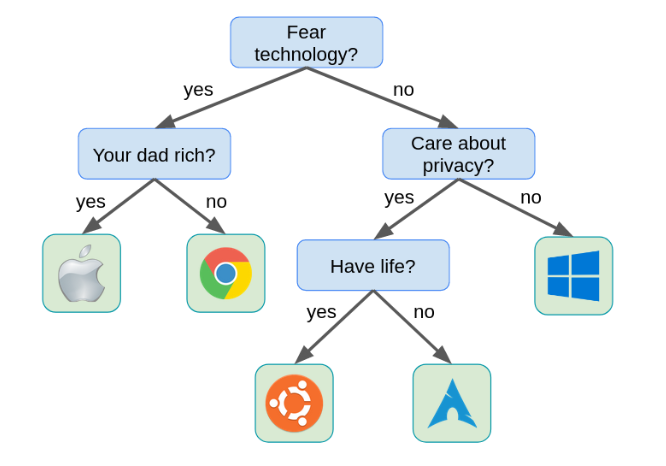


### Gini Impurity

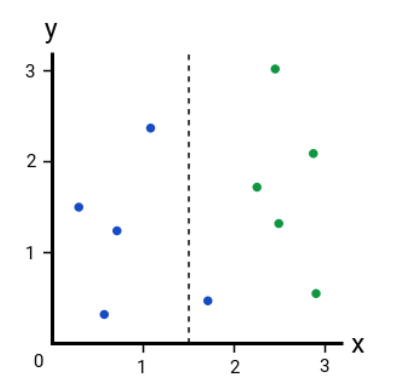

#### Ruas Kiri:

$
\begin{align*} 
G &= 1 - \sum_i^n P_i^2 \\
  &= 1 - P(biru)^2 \\
  &= 1 - (\frac{4}{4})^2 = 0
\end{align*}
$

#### Ruas Kanan:

$
\begin{align*}
G &= 1 - \sum_i^n P_i^2 \\
  &= 1 - (P(biru)^2 + P(hijau)^2)\\
  &= 1 - ( (\frac{1}{6})^2 + (\frac{5}{6})^2 ) = 0.278
\end{align*}
$


#### Average Gini Impurity:

$
\begin{align*}
G &= \frac{4}{4+6} \times 0 + \frac{6}{4+6} \times  0.278 \\
  &= 0.1668
\end{align*}
$

### Information Gain

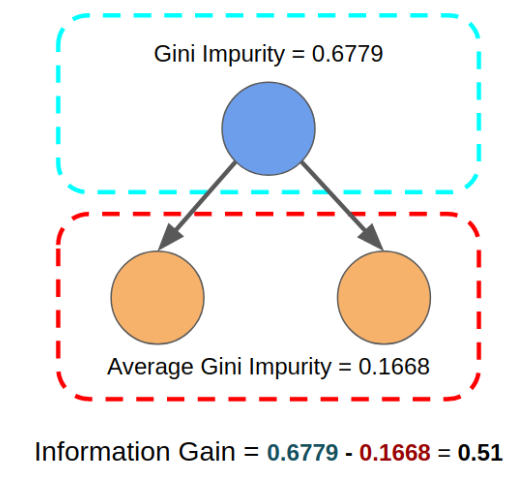

### Membangun Decision Tree

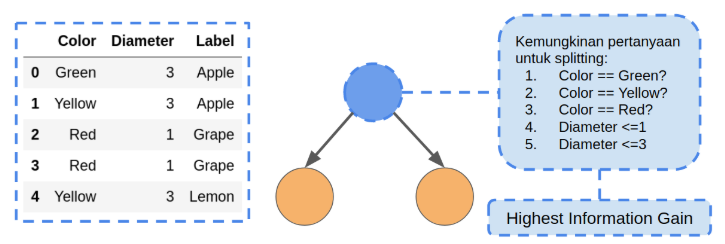

$
\begin{align*} 
G &= 1 - (P(apple)^2 + P(grape)^2 + P(lemon)^2) \\
   &=1 - ( (\frac{2}{5})^2 + (\frac{2}{5})^2 + (\frac{1}{5})^2 ) \\
   &= 0.63
\end{align*}    
$

In [1]:
1 - ( (2/5)**2 + (2/5)**2 + (1/5)**2 )

0.6399999999999999

In [2]:
import pandas as pd

training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

# Column labels.
# These are used only to print the tree.
header = ["Color", "Diameter", "Label"]

pd.DataFrame(training_data, columns=header)

,Color,Diameter,Label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


## Dataset

Referensi: [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [3]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (150, 4)
Class: {0, 1, 2}


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

## Classification dengan `DecisionTreeClassifier`

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## Visualisasi Model

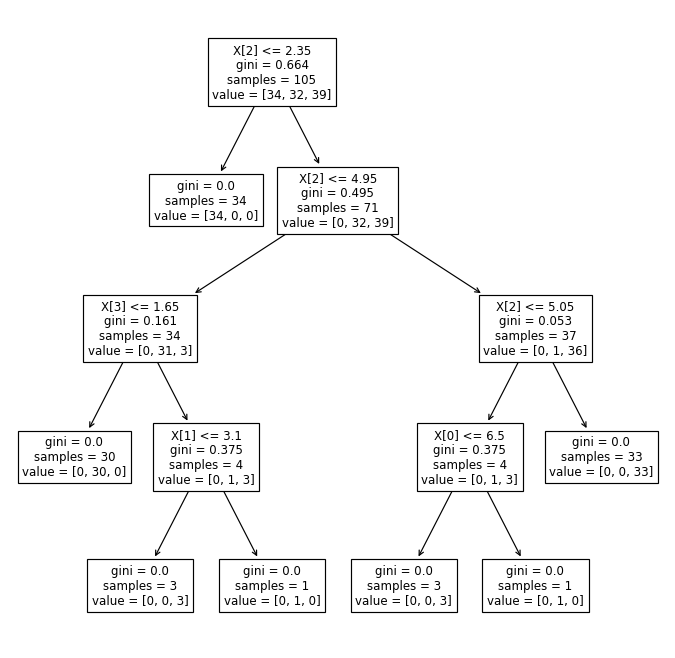

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10, 10))
tree.plot_tree(model, fontsize=10)
plt.show()

## Evaluasi Model

In [7]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

